In [1]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
%matplotlib inline

1. Linear regression
===================

Prepare data
------------
First we will prepare some data for demonstrating linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data:
$$y = \frac{x}{2}+sin(x)+\epsilon$$
Where $\epsilon \sim \mathcal{N}(0,1)$ is Gaussian noise.

 $y = \frac{x}{2}+sin(x)+\epsilon$

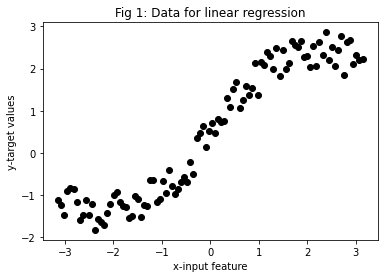

In [2]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

Split the dataset into training, validation and test sets
---------------------------------------------------
It is always encouraged in machine learning to split the available data into _training_, _validation_ and _test_ sets. The training set is supposed to be used to train the model. The model is evaluated on the validation set after every episode of training. The performance on the validation set gives a measure of how good the model _generalizes_. Various hyperparameters of the model are tuned to improve performance on the validation set. Finally when the model is completely optimized and ready for deployment, it is evaluated on the _test data_ and the performance is reported in the final description of the model. 

In this example we do a $70\%-15\%-15\%$ random split of the data between the training, validation and test sets respectively.

In [3]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

Fit a line to the data
----------------------
Linear regression learns to fit a hyperplane to our data in the feature space. For one dimensional data, the hyperplane reduces to a straight line. We will fit a line to our data using [__sklearn.linear_model.LinearRegression__](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

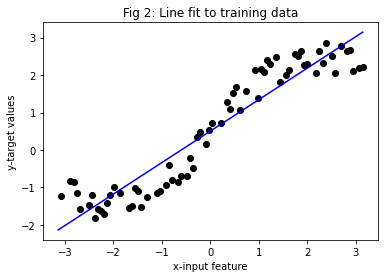

In [4]:
model = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshape the arrays into column matrices
x_train_for_line_fitting = np.asarray(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.asarray(y_train.reshape(len(y_train),1))

#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

Evaluate the model
------------------
Now that we have our model ready, we must evaluate our model. In a linear regression scenario, its common to evaluate the model in terms of the _mean squared error_ on the validation and test sets.

In [5]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  4.551849089397688 
Test MSE:  4.502805666086664


2. Logistic regression
======================
Logistic regression is used for classification using a _linear_ decision boundary. Logistic regression works by first looking for linear decision boundaries between the samples of different classes. Then the logistic function $\sigma(\cdot)$ is used to get the probability of belongingness to each class defined with respect to the decision boundaries. The logistic function is defined as follows:
$$\sigma(z)=\frac{1}{1+e^{-z}}$$
The output probability of belongingness to a class that can be suitably thresholded to get hard classification.

In this tutorial we will demonstrate this with the example of classifying a part of the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris).  

Prepare data
------------
The data has 4 input-features and 3 output-classes. For simplicity we will use only two features: _sepal-length_ and _sepal-width_ (both in cm) and two output classes: _Iris Setosa_ and _Iris Versicolour_. 

In [6]:
import pandas as pd
iris = datasets.load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

C:\Users\HP\AppData\Local\Temp/ipykernel_7360/1899425044.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
C:\Users\HP\AppData\Local\Temp/ipykernel_7360/1899425044.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

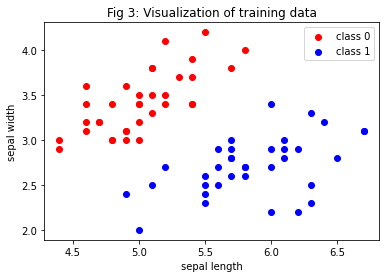

In [8]:
#The first 50 samples are class 0 and the next 50 samples are class 1
X = X[:100]
Y = Y[:100]
number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

#Visualizing the training data
X_class0 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Fig 3: Visualization of training data')
plt.show()

Fit logistic regression model
-----------------------------
Now we fit a linear decision boundary through the feature space that separates the two classes well. We use [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

C:\Users\HP\AppData\Local\Temp/ipykernel_7360/3038445898.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


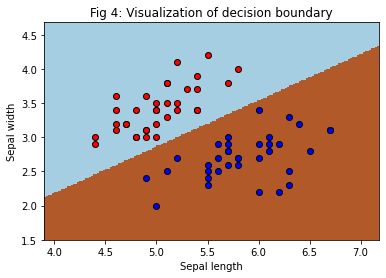

In [9]:
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
full_X = np.concatenate((X_class0,X_class1),axis=0)
full_Y = np.concatenate((Y_class0,Y_class1),axis=0)
model.fit(full_X,full_Y)

# Display the decision boundary
#(Visualization code taken from: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - .5, full_X[:, 0].max() + .5
y_min, y_max = full_X[:, 1].min() - .5, full_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_class0[:, 0], X_class0[:, 1], c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

Notice the linear decision boundary calculated by logistic regression.

Evaluate the model
------------------
We calculate the validation and test misclassification errors.

In [10]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 6.666666666666667 %
test misclassification percentage = 0.0 %


Zero misclassification error was possible only because the two classes were _linearly separable_ in the chosen feature space. However this is seldom the case in most real-world classification problems.

3. Decision tree regression
===========================
Now we will solve the same problems using a decision tree. A decision tree is a _non-parametric_ machine learning model in contrast to linear/logistic regression which is a _parametric_ model.

First we solve the regression problem

Prepare data
------------
Same as in Section 1

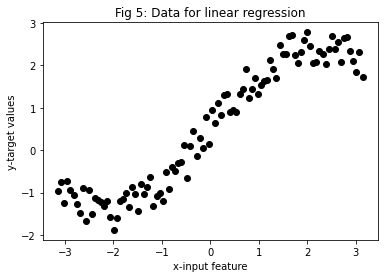

In [11]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()

Split the data into training, validation and test sets
------------------------------------------------------


In [12]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

Fit a line to the data
----------------------
A decision tree learns a piece-wise linear fit to the data. We will use [sklearn.tree.DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

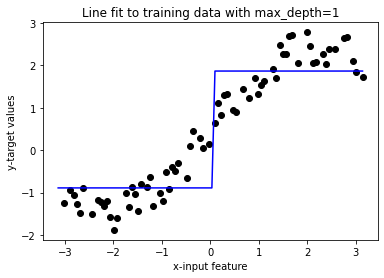

Training MSE:  0.33669192758868716 
Validation MSE:  0.42551964545554555 
Test MSE:  0.4593497971217379


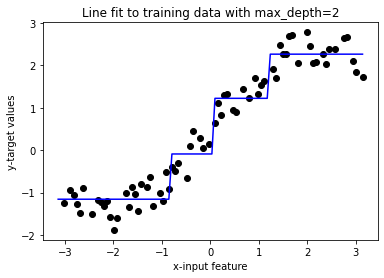

Training MSE:  0.10238818241933816 
Validation MSE:  0.13240110617485942 
Test MSE:  0.1260750335362984


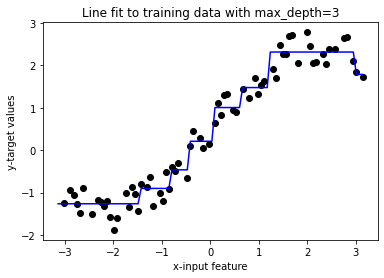

Training MSE:  0.05998054188410556 
Validation MSE:  0.08931544399753023 
Test MSE:  0.13344049209373093


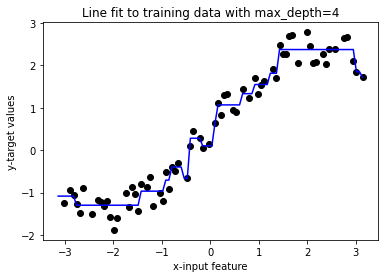

Training MSE:  0.04424622767183913 
Validation MSE:  0.08318195654533024 
Test MSE:  0.15831098235086452


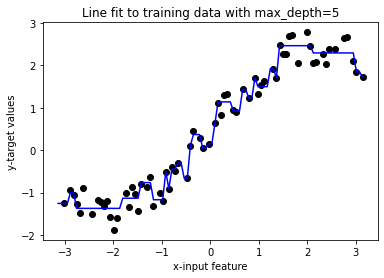

Training MSE:  0.031588126251027956 
Validation MSE:  0.10817409088275053 
Test MSE:  0.1725434659264922


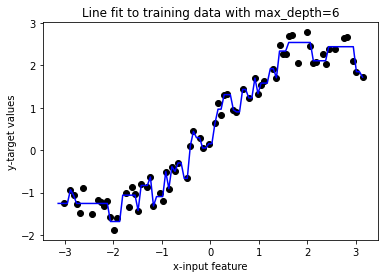

Training MSE:  0.01633961760471046 
Validation MSE:  0.11358830052566106 
Test MSE:  0.18035313238356343


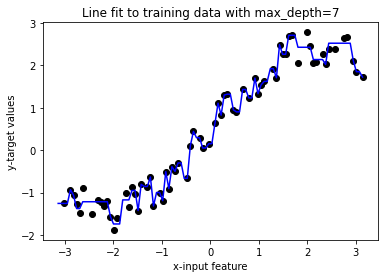

Training MSE:  0.00992670616489461 
Validation MSE:  0.11842117572996667 
Test MSE:  0.18944367882344348


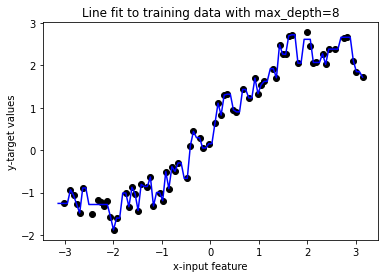

Training MSE:  0.001820230620851098 
Validation MSE:  0.1665186386725469 
Test MSE:  0.18969023925118073


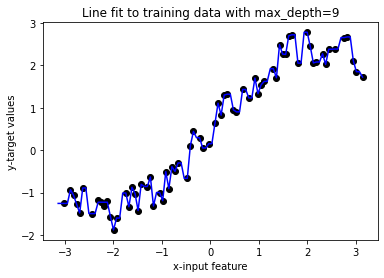

Training MSE:  0.00019788581806209492 
Validation MSE:  0.1810116708007453 
Test MSE:  0.19724458436209724


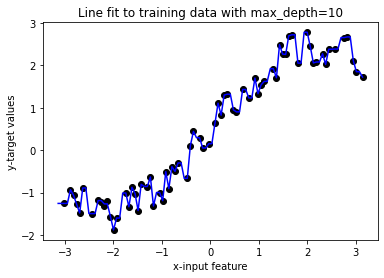

Training MSE:  0.0001081078327187302 
Validation MSE:  0.1810116708007453 
Test MSE:  0.19724458436209724


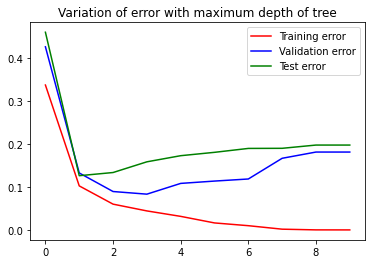

In [13]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.asarray(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.asarray(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print ('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

Notice how the generalization performance of the model can be controlled via the depth of a decision tree. The training error decreases steadily with increasing depth as the model fits the data more and more closely. The generalization errors given by the validation and test errors also decrease till a depth of 3 as the bias in the model reduces. However, as we increase the depth beyond 3, the model starts overfitting the data (huggs onto noise in the data) and validation and test errors increase. Thus the ability of the model to generalize deteriorates as overfitting sets in.

4. Decision tree classification
===============================

A decision tree can be used to learn a piece-wise linear decision boundary between classes. We demonstrate the working of a decision tree on the entire of Iris dataset. We use [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

The example was taken from: http://scikit-learn.org/stable/modules/tree.html#classification.

The decision boundaries learnt by the different decision nodes can be visualized as described here: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#plot-the-decision-surface-of-a-decision-tree-on-the-iris-dataset.

Prepare the data-set
--------------------

In [14]:
iris = datasets.load_iris()
X = iris.data #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

Fit the model
------------

In [15]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

Visualize the model
-------------------

In [18]:
!pip install six

In [23]:
!pip install pydot

  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.4
    Uninstalling pyparsing-3.0.4:
      Successfully uninstalled pyparsing-3.0.4


In [21]:
from six import StringIO

In [25]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=6321c366fff6dc6bcdd2d57921f0a3b31aad3f1866dead311e67feef7bc87252
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [26]:
!pip install graphviz

In [31]:
!pip install pydot-ng
#sudo apt-get install graphviz

In [46]:
#from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png()) 

AttributeError: type object 'pyparsing_unicode' has no attribute 'BasicMultilingualPlane'

The [_gini coefficient_](https://en.wikipedia.org/wiki/Gini_coefficient) is a measure of homogenity in a cluster. Gini coefficient of 0.0 indicates that a cluster is completely homogeneous (i.e. only one class is present in the cluster).

Evaluate the model
------------------  

In [22]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,len(x_val[i]))))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 13.636363636363637 %
test misclassification percentage = 13.636363636363637 %


In [44]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

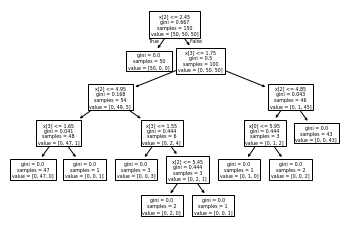

In [45]:
tree.plot_tree(clf)

### Plot the decision surface of decision trees trained on the iris dataset

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

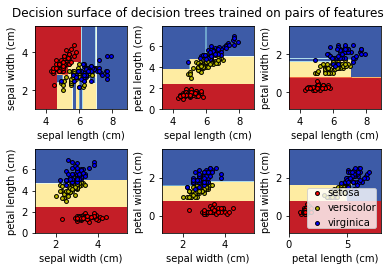

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

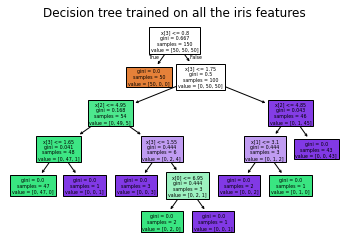

In [4]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()